In [309]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm

size = 10000

down = np.random.choice([4], size=size)

quarter = np.random.choice([1, 2, 3, 4], size=size)

yardsToGo = np.random.exponential(scale=3, size=size).astype(int) + 1

max_yardlineNumber = 95

yardlineNumber = np.minimum(np.random.exponential(scale=15, size=size).astype(int) + 1, max_yardlineNumber)  

defendersInTheBox = np.round(np.clip(np.random.normal(loc=7, scale=1.5, size=size), 3, 11)).astype(int)

numberOfPassRushers = np.round(np.clip(np.random.normal(loc=4.5, scale=1, size=size), 2, 7)).astype(int)

HomeScoreBeforePlay = np.zeros(size).astype(int)
VisitorScoreBeforePlay = np.zeros(size).astype(int)

HomeScoreAfterPlay = np.copy(HomeScoreBeforePlay)
VisitorScoreAfterPlay = np.copy(VisitorScoreBeforePlay)

for i in range(size):
    
    q1 = [0,3,6,7,10,13,14]
    q2 = [0,3,6,7,10,13,14,17,20,21,23,24]
    q3 = [0,3,6,7,10,13,14,17,20,21,23,24,27,28,31,34]
    q4 = [0,3,6,7,10,13,14,17,20,21,23,24,27,28,31,34,37,40,42]
    
    if quarter[i] == 1:
        HomeScoreBeforePlay[i] = np.random.choice(q1)
        VisitorScoreBeforePlay[i] = np.random.choice(q1)
    elif quarter[i] == 2:
        HomeScoreBeforePlay[i] = np.random.choice(q2)
        VisitorScoreBeforePlay[i] = np.random.choice(q2)
    elif quarter[i] == 3:
        HomeScoreBeforePlay[i] = np.random.choice(q3)
        VisitorScoreBeforePlay[i] = np.random.choice(q3)
    else:
        HomeScoreBeforePlay[i] = np.random.choice(q4)
        VisitorScoreBeforePlay[i] = np.random.choice(q4)

HomeScoreAfterPlay = np.copy(HomeScoreBeforePlay)
VisitorScoreAfterPlay = np.copy(VisitorScoreBeforePlay)

PlayResult = np.zeros(size).astype(int)
x = truncnorm(-5,80, loc=5, scale=5)
playresults = x.rvs(size).astype(int)

PlayResult = playresults
    
for i in range(size):
    
    if PlayResult[i] >= yardsToGo[i]:
        if PlayResult[i] > yardlineNumber[i]:
            PlayResult[i] = yardlineNumber[i]
            if np.random.choice([True, False]):
                HomeScoreAfterPlay[i] += 6
                if np.random.random() < .946:    # NFL 2022 extra point %
                    HomeScoreAfterPlay[i] += 1
            else:
                VisitorScoreAfterPlay[i] += 6
                if np.random.random() < .946:
                    VisitorScoreAfterPlay[i] += 1

isPenalty = np.zeros(size).astype(int)

PassLength = np.zeros(size).astype(int)
YardsAfterCatch = np.zeros(size).astype(int)

for i in range(size):
    if PlayResult[i] == 0:
        YardsAfterCatch[i] = 0
        PassLength[i] = 0
    elif PlayResult[i] < 0:
        x = random.choice([-1,0])
        PassLength[i] = x
        YardsAfterCatch[i] = PlayResult[i] - PassLength[i]
        
    else:
        PassLength[i] = random.randint(1, abs(PlayResult[i]))
        YardsAfterCatch[i] = PlayResult[i] - PassLength[i]
        
firstDown_Conversion = np.zeros(size).astype(int)

for i in range(size):
    
    if PlayResult[i] > yardsToGo[i]:
        firstDown_Conversion[i] += 1

# need to adjust defenders in box and pass rushers to somewhat depend on each other
# need to figure out what to do with isPenalty

newdata = pd.DataFrame({
    'down': down,
    'quarter': quarter,
    'yardsToGo': yardsToGo,
    'yardlineNumber': yardlineNumber,
    'defendersInTheBox': defendersInTheBox,
    'numberOfPassRushers': numberOfPassRushers,
    'HomeScoreBeforePlay': HomeScoreBeforePlay,
    'HomeScoreAfterPlay': HomeScoreAfterPlay,
    'VisitorScoreBeforePlay': VisitorScoreBeforePlay,
    'VisitorScoreAfterPlay': VisitorScoreAfterPlay,
    'isPenalty': isPenalty,
    'PassLength': PassLength,
    'YardsAfterCatch': YardsAfterCatch,
    'PlayResult': PlayResult,
    'firstDown_Conversion': firstDown_Conversion
})

newdata = newdata.dropna()
#newdata.to_csv('simulated_data.csv', index=False)

In [310]:
newdata

,down,quarter,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,HomeScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreBeforePlay,VisitorScoreAfterPlay,isPenalty,PassLength,YardsAfterCatch,PlayResult,firstDown_Conversion
0,4,4,1,48,8,6,27,27,17,17,0,3,4,7,1
1,4,3,2,19,6,4,17,17,10,10,0,11,0,11,1
2,4,4,2,45,6,5,37,37,0,0,0,0,-5,-5,0
3,4,1,7,4,7,5,10,17,10,10,0,4,0,4,0
4,4,4,2,3,8,4,24,24,28,35,0,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,2,2,19,7,5,17,17,17,17,0,0,0,0,0
9996,4,3,7,50,4,6,13,13,7,7,0,-1,0,-1,0
9997,4,3,4,2,7,4,6,6,20,20,0,-1,-5,-6,0
9998,4,2,12,14,7,5,7,7,21,21,0,1,0,1,0


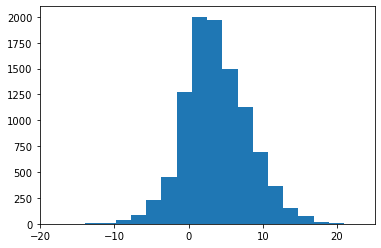

In [311]:
plt.hist(PlayResult, bins=20)
plt.show()